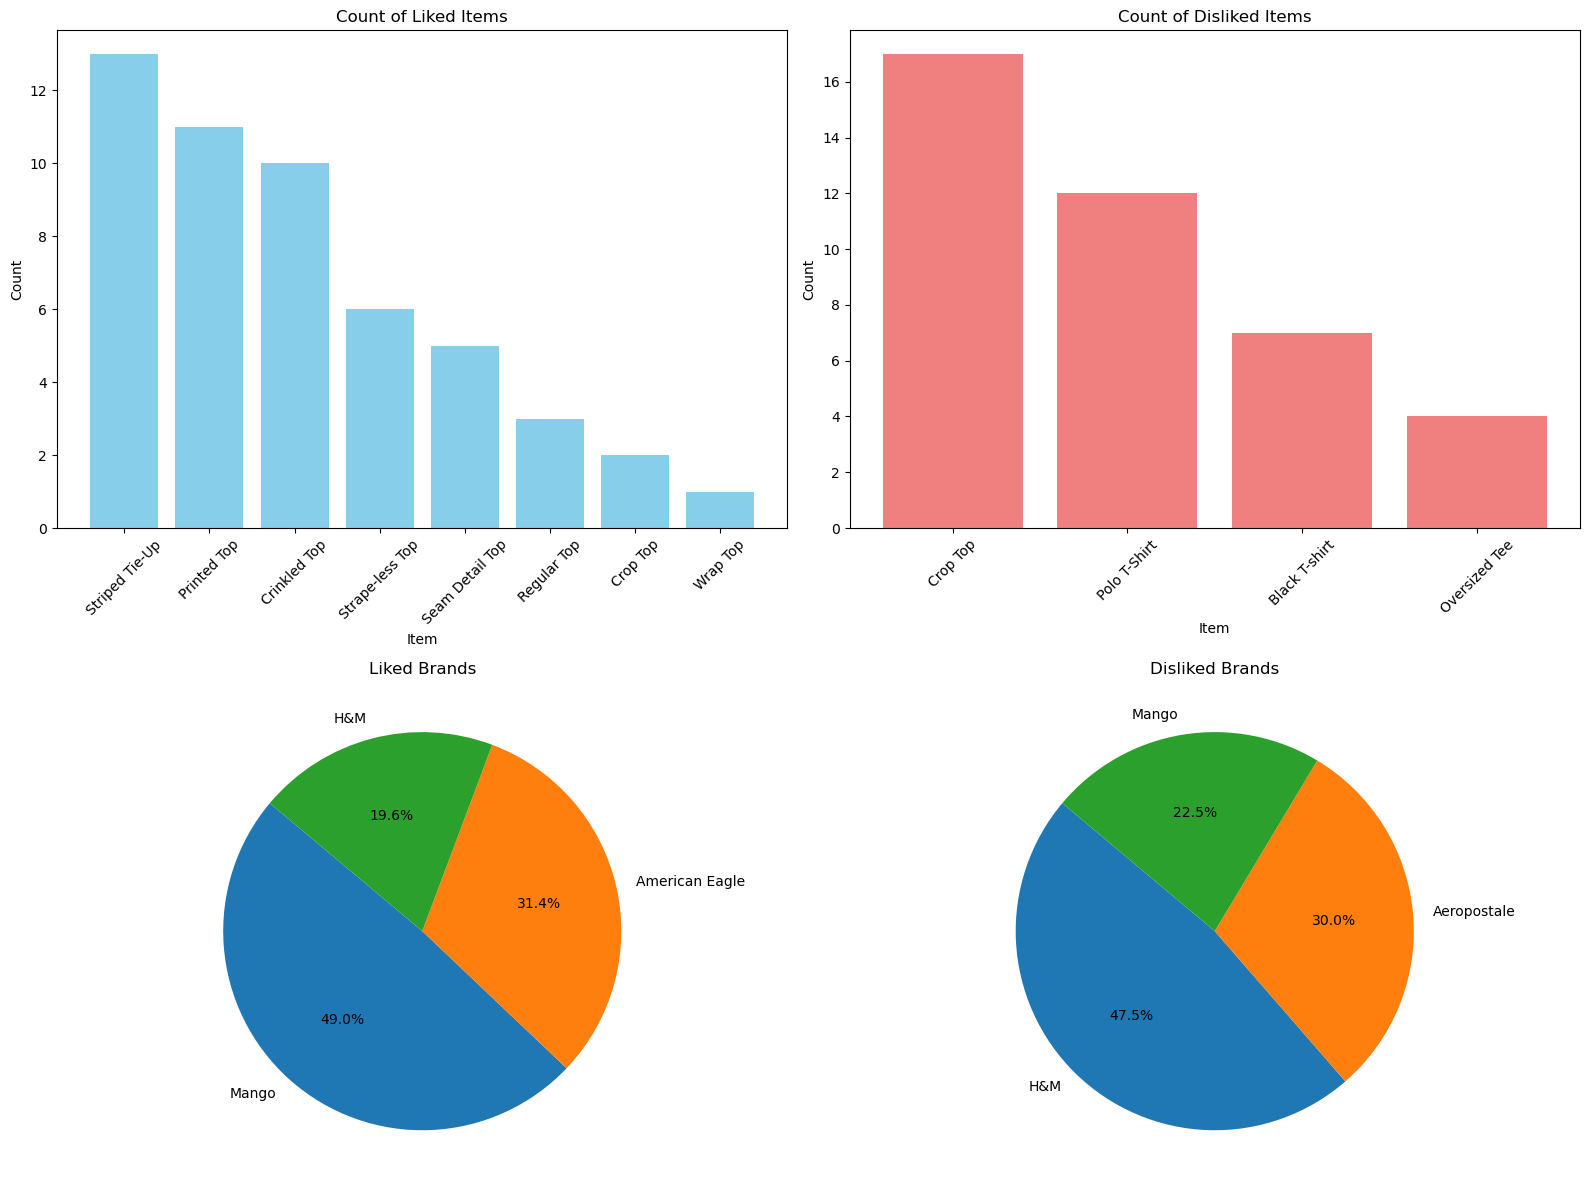

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch data from Flask server
def fetch_stats():
    url = 'http://127.0.0.1:5000/stats'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

# Function to display statistics and visualizations
def display_stats(stats):
    # Convert data to pandas DataFrames
    liked_counts = pd.DataFrame(stats['liked_counts'])
    disliked_counts = pd.DataFrame(stats['disliked_counts'])
    liked_tags = pd.DataFrame(stats['liked_tags'])
    disliked_tags = pd.DataFrame(stats['disliked_tags'])

    # Set up the plots with improved styling
    plt.figure(figsize=(16, 12))

    # Plot for Count of Liked Items
    plt.subplot(2, 2, 1)
    liked_counts_by_text = liked_counts.set_index('text')['count']
    plt.bar(liked_counts_by_text.index, liked_counts_by_text.values, color='skyblue')
    plt.title('Count of Liked Items')
    plt.xlabel('Item')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot for Count of Disliked Items
    plt.subplot(2, 2, 2)
    disliked_counts_by_text = disliked_counts.set_index('text')['count']
    plt.bar(disliked_counts_by_text.index, disliked_counts_by_text.values, color='lightcoral')
    plt.title('Count of Disliked Items')
    plt.xlabel('Item')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot for Liked Brands (Pie Chart)
    plt.subplot(2, 2, 3)
    liked_brands = liked_tags['tags'].apply(lambda x: x.get('brand'))
    liked_brands_counts = liked_brands.value_counts()
    plt.pie(liked_brands_counts, labels=liked_brands_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Liked Brands')

    # Plot for Disliked Brands (Pie Chart)
    plt.subplot(2, 2, 4)
    disliked_brands = disliked_tags['tags'].apply(lambda x: x.get('brand'))
    disliked_brands_counts = disliked_brands.value_counts()
    plt.pie(disliked_brands_counts, labels=disliked_brands_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Disliked Brands')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Fetch data from server
stats = fetch_stats()

if stats:
    display_stats(stats)


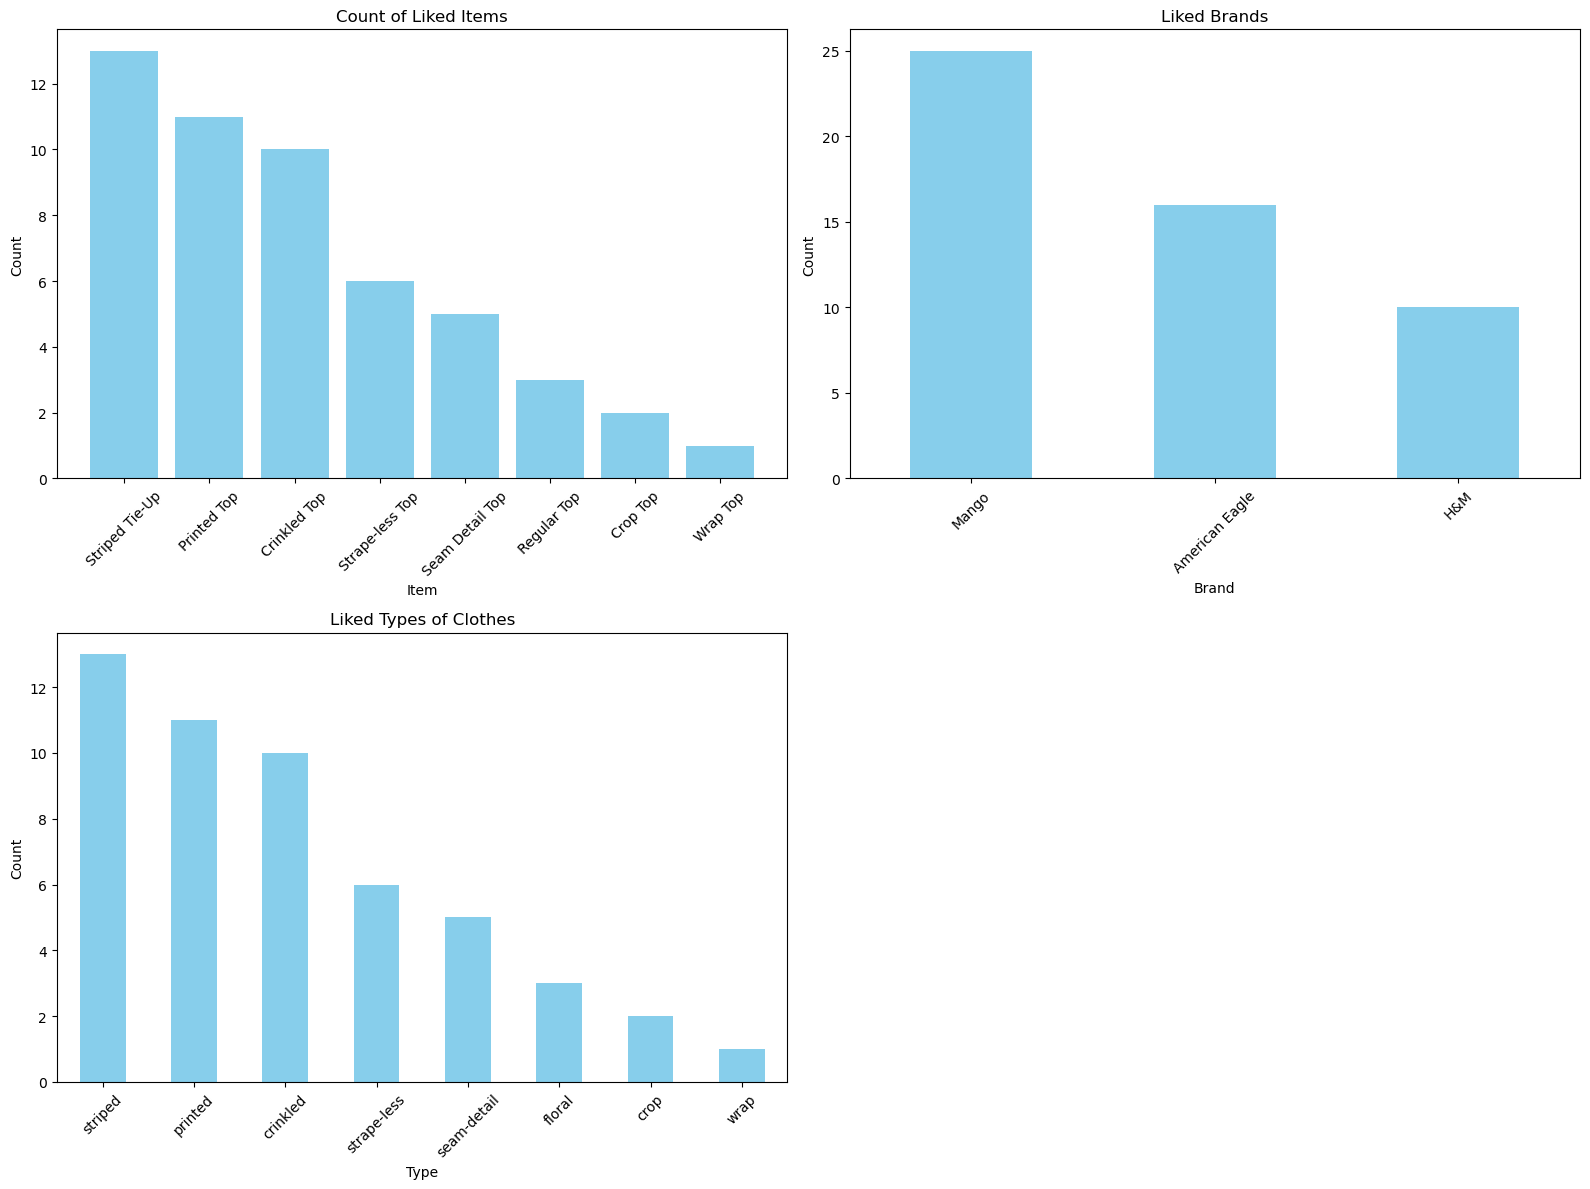

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch data from Flask server
def fetch_stats():
    url = 'http://127.0.0.1:5000/stats'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

# Function to display statistics and visualizations
def display_stats(stats):
    # Convert data to pandas DataFrames
    liked_counts = pd.DataFrame(stats['liked_counts'])
    liked_tags = pd.DataFrame(stats['liked_tags'])

    # Set up the plots with improved styling
    plt.figure(figsize=(16, 12))

    # Plot for Count of Liked Items
    plt.subplot(2, 2, 1)
    liked_counts_by_text = liked_counts.set_index('text')['count']
    plt.bar(liked_counts_by_text.index, liked_counts_by_text.values, color='skyblue')
    plt.title('Count of Liked Items')
    plt.xlabel('Item')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot for Liked Brands
    plt.subplot(2, 2, 2)
    liked_brands = liked_tags['tags'].apply(lambda x: x.get('brand'))
    liked_brands_counts = liked_brands.value_counts()
    liked_brands_counts.plot(kind='bar', color='skyblue')
    plt.title('Liked Brands')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot for Liked Types of Clothes
    plt.subplot(2, 2, 3)
    liked_types = liked_tags['tags'].apply(lambda x: x.get('type'))
    liked_types_counts = liked_types.value_counts()
    liked_types_counts.plot(kind='bar', color='skyblue')
    plt.title('Liked Types of Clothes')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Fetch data from server
stats = fetch_stats()

if stats:
    display_stats(stats)
